In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

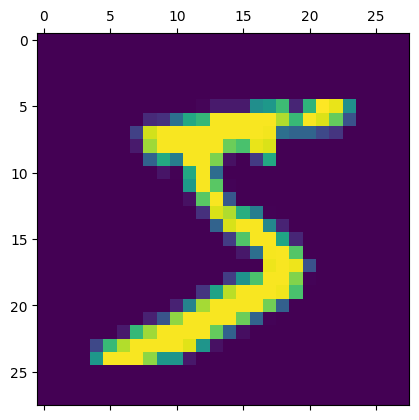

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 2.3721 - accuracy: 0.0857
loss=2.372
Accuracy=0.086


In [15]:
#Making Prediction on new data

<function matplotlib.pyplot.show(close=None, block=None)>

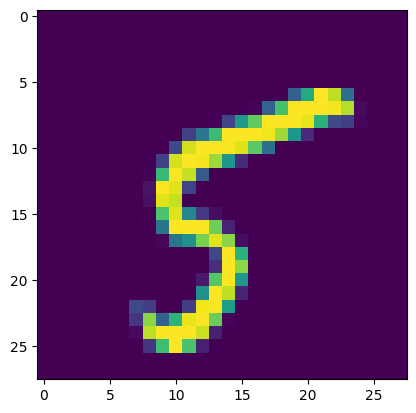

In [16]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [17]:
test_predict = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [18]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test,predictions=test_predict_labels)
print('confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set:
 tf.Tensor(
[[ 30   0   3  11  19 218 693   5   0   1]
 [  0   0   0   0  12 798 324   0   1   0]
 [ 30   0   0  10  30 557 397   4   3   1]
 [  0   0   0   1  38 796 166   0   3   6]
 [ 43   0   2  50  48 451 374  12   2   0]
 [ 42   0   0   8  23 489 325   3   2   0]
 [ 76   1   1   9  25 670 165   9   2   0]
 [ 80   0   0   4  14 453 380  86   0  11]
 [  5   0   0  25  22 564 319   1  36   2]
 [ 52   0   3  18  66 602 253  13   0   2]], shape=(10, 10), dtype=int32)
